In [1]:
import urllib2
import bs4 #this is beautiful soup

import time
from pandas import Series
from bs4 import SoupStrainer
import pandas as pd
from pandas import DataFrame
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)


/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [ ]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]

job_count_string = job_count_string.split()[-2]

print("Search yielded %s hits." % (job_count_string))
# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]

job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

num_pages = int(np.ceil(job_count/10.0))

In [3]:
company=[]
# Make a list of first 1000 companies in first 1000 ads
# If want to go through all pages,use range(num_pages) instead of 130
for i in range(130):
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page1 = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page1)
    row = bs_tree.find_all('span',class_='company')
    row=str(row)
    row=row.split('</a>')

    for i in row[:-1]: 
        i=i.split('   ')
        if len(company)<1000: 
            company.append(i[-1])
            
print len(company)            
      



1000


In [4]:
location=[]


for i in range(130):
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page1 = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page1)
    r1= bs_tree.find_all('span',class_='location')
    r1=str(r1)
    r1=r1.split("</span>")
    for i in r1[:-1]: 
        i=i.split('>')
        if len(location)<1000: 
            location.append(i[-1])
            
print len(location)
   

1000


In [5]:
base_url = 'http://www.indeed.com'
job_links = []
print "run"
for i in range(130): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
   
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]

    # go after each link
    
    for id in job_ids:
        if len(job_links)<1000:
            job_links.append(base_url + '/rc/clk?jk=' + id)
        
    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

run
We found a lot of jobs:  1000


In [39]:
skill_set = {'hadoop':[],'java':[],'tableau':[],'big data':[],'mapreduce':[], 'spark':[], 'visualization':[],'sql':[],'machine learning':[],'deep learning':[],'python':[],'graphical model':[],'communication':[],'data analytic':[],'problem solving':[],'sas':[],' data mining':[],'math':[],'tensorflow':[],'matlab':[]}
counter = 0
for link in job_links:
    counter +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        #print "HTTPError:"
        continue
    except urllib2.URLError:
        #print "URLError:"
        continue
    except socket.error as error:
        #print "Connection closed"
        continue
  
    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters

    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key].append("True")
            
        else:    
             skill_set[key].append("False")
    #if counter % 5 == 0:
       # print len(job_links) - counter
        #print skill_set


In [100]:
 for i in range(130): #do range(num_pages) if you want them all
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    row2 = bs_tree.find_all('h2',class_='jobtitle')
 
    row2=str(row)
    row2=row2.split("</h2>")
    row2[0]=row2[0].split("title")
    k= row2[0]
    k=k[-1] 
  
    k=k.split("\"")
    a=k[1]
    if len(jobtitle)<1000:
        jobtitle.append(a)
   

In [58]:
skill = pd.DataFrame(skill_set)
setskill=skill.columns
print setskill


Index([u' data mining', u'big data', u'communication', u'data analytic',
       u'deep learning', u'graphical model', u'hadoop', u'java',
       u'machine learning', u'mapreduce', u'math', u'matlab',
       u'problem solving', u'python', u'sas', u'spark', u'sql', u'tableau',
       u'tensorflow', u'visualization'],
      dtype='object')


In [16]:
dfcompany=pd.Series(company)
print dfcompany.head()

0                           Bartech Group
1                               Novozymes
2                              LexisNexis
3     Children's Hospital of Philadelphia
4                                   Intel
dtype: object


In [166]:
dfloc=pd.Series(location)
dftitle=pd.Series(jobtitle)


In [109]:
df3=pd.DataFrame()

In [110]:
df3['company']=dfcompany
df3['location']=dfloc
df3['title']=dftitle

In [121]:
for i in setskill:
    df3[i]=skill[i]
df3.head()

,company,location,title,data mining,big data,communication,data analytic,deep learning,graphical model,hadoop,...,math,matlab,problem solving,python,sas,spark,sql,tableau,tensorflow,visualization
0,Bartech Group,"Dearborn, MI",Data Scientist I,False,True,True,False,False,False,True,...,True,False,True,False,True,True,True,False,False,False
1,Novozymes,"St. Louis, MO",Data Scientist,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,LexisNexis,"Research Triangle Park, NC",Data Scientist,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Children's Hospital of Philadelphia,"Raleigh, NC",Data Scientist,False,True,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4,Intel,(Point Breeze area),Data Scientist,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,False,False,False


Text(0.5,1,u'Top 20 famous companies')

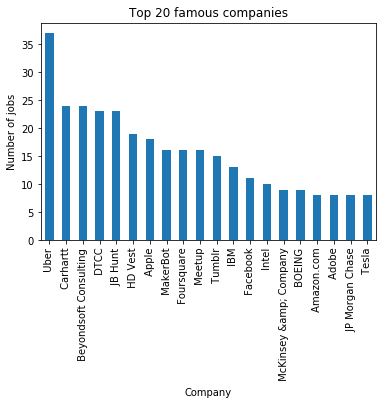

In [122]:
df2.head(10)
comp=df3['company'].value_counts()
comp[0:20].plot(kind='bar')
plt.title
plt.xlabel('Company')
plt.ylabel('Number of jobs')
plt.title('Top 20 famous companies')

In [150]:
states=df3['location'].str.split(',',-1,expand=True)
type(states)

pandas.core.frame.DataFrame

Text(0.5,1,u'Number of Data Science jobs in states')

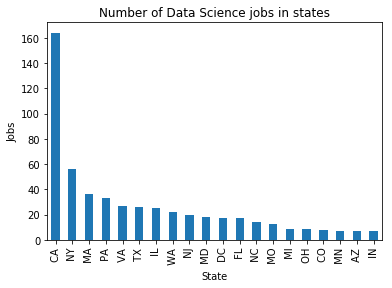

In [164]:
top=states[1].value_counts()
top20=top[0:20]
top20.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Jobs")
plt.title("Number of Data Science jobs in states")